<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [45]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [50]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [47]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [48]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from collections import Counter

# Importacion de datos

In [5]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

In [6]:
tabla_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   desercion_año_anterior         4410 non-null   object 
 1   frecuencia_viajes              4410 non-null   object 
 2   departamento                   4410 non-null   object 
 3   distancia_domicilio            4410 non-null   int64  
 4   educacion                      4410 non-null   int64  
 5   formacion                      4410 non-null   object 
 6   nivel_de_cargo                 4410 non-null   int64  
 7   nombre_cargo                   4410 non-null   object 
 8   estado_civil                   4410 non-null   object 
 9   ingresos_mensuales             4410 non-null   int64  
 10  empresas_anteriores            4410 non-null   float64
 11  porcentaje_aumentosalario      4410 non-null   int64  
 12  nivel_de_opciones              4410 non-null   i

# Normalización

In [7]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

In [8]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,empresas_anteriores,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,60290,3.0,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,26790,2.0,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,37020,0.0,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,Divorced,23980,0.0,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


In [9]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


In [10]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Modelo base

## Modelo base sin balanceo de clases

In [11]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.866


In [12]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.854


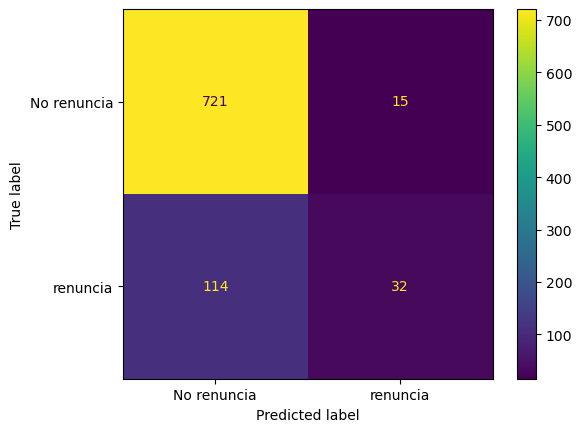

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [14]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.6808510638297872
Recall: 0.2191780821917808
Especificidad: 0.9796195652173914
F1 score: 0.33160621761658027


In [15]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.15
RMSE 0.38
MAE: 0.15
MAPE: 76591830397457.55
R2: -0.06
R2-adjusted: -0.12


## Modelo base con balaceno de clases

In [23]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.735


In [24]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el entrenamiento: 0.730


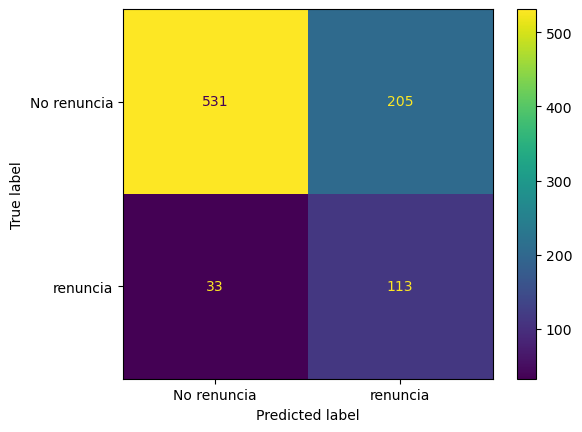

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [19]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3553459119496855
Recall: 0.773972602739726
Especificidad: 0.7214673913043478
F1 score: 0.4870689655172413


In [20]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.27
RMSE 0.52
MAE: 0.27
MAPE: 1046755015431918.00
R2: -0.95
R2-adjusted: -1.06


# Balanceo de clases 

In [25]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 2963, 1: 565})
Distribution after resampling Counter({0: 2963, 1: 2963})


In [22]:
x_train_res

array([[ 8.85877084e-02,  1.06157620e+00, -5.70369269e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.95782167e-01,  1.06157620e+00, -9.63461603e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.95782167e-01,  1.06157620e+00, -5.70369269e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.95782167e-01,  1.06157620e+00, -5.70369269e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.26643464e-01, -5.82069314e-01,  2.89898622e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.67901570e-04,  8.74155194e-01,  6.74571444e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Seleccion de variables


## Metodo integrado 

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2

In [27]:
# metodo integrado
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

In [28]:

sel_ = SelectFromModel(Lasso(alpha = 0.001, max_iter=10000), max_features=30) #entre mas aumente el parametro de serializacon, ams variables van atender a 0
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new = sel_.get_support()#descarta los coeficientes mas cercanos a 0
X_train_base1 = X_train_std[:,X_new]
X_test_base1= X_test_std[:,X_new]
X_train.iloc[:,X_new]

[ 0.         -0.01081579 -0.01303376 -0.00273115  0.02430082  0.00850781
 -0.00028853 -0.05482048 -0.02538189 -0.04272139 -0.03879022 -0.02354445
 -0.00059229  0.06982309 -0.04076478  0.08248976  0.          0.09572497
  0.         -0.00771387  0.04197118  0.02042117 -0.          0.
 -0.03080051 -0.01811491 -0.00861084  0.          0.         -0.
 -0.0407928   0.05455909  0.01293689  0.01158804 -0.03567841 -0.01668971
 -0.          0.1124524   0.02531762 -0.          0.03062084  0.03264521
 -0.         -0.01143032 -0.05577376]


,educacion,nivel_de_cargo,empresas_anteriores,porcentaje_aumentosalario,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,tiempo_prom_dia,...,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
765,4,2,2.0,16,5.0,0,1.0,1.0,4.0,6.1712,...,0,0,1,0,0,0,1,0,0,0
2928,4,1,1.0,12,2.0,2,3.0,4.0,2.0,6.1356,...,0,1,0,0,0,0,1,0,0,0
1180,4,2,1.0,11,1.0,0,4.0,1.0,2.0,7.3485,...,0,0,0,0,0,0,0,1,0,0
2552,3,1,1.0,14,10.0,7,2.0,3.0,3.0,8.7723,...,0,1,0,0,0,0,1,0,0,0
92,4,3,0.0,12,4.0,0,3.0,3.0,3.0,8.0868,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,1,1,6.0,21,26.0,1,1.0,3.0,1.0,6.2904,...,0,0,0,0,0,0,0,1,0,0
2736,4,3,7.0,20,5.0,0,3.0,4.0,2.0,9.8238,...,0,1,0,0,0,0,1,0,0,0
3848,4,3,2.0,14,23.0,2,3.0,4.0,3.0,6.7245,...,0,0,0,0,0,0,1,0,0,0
3405,3,3,6.0,11,13.0,7,4.0,3.0,3.0,6.7268,...,0,0,0,1,0,0,1,0,0,0


## Método Wrapper 

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return X_new  

In [30]:
# Establecer Estimador
model = LogisticRegression(max_iter=100)
# Obtener columnas seleciconadas - (3 caracteristicas)
X_new_class = recursive_feature_selection(X_train_std, y_train, model, 30)

# Nuevo conjunto de datos
X_train_base2 = X_train_std[:,X_new_class]
X_test_base2= X_test_std[:,X_new_class]
X_train.iloc[:,X_new]

Num Features: 30
Selected Features: [False False False False  True False False  True  True  True  True  True
 False  True  True  True False  True  True  True  True  True False False
  True  True False False  True False  True  True  True  True  True  True
  True  True  True False  True  True False  True  True]
Feature Ranking: [15  5  2 14  1  6 11  1  1  1  1  1 12  1  1  1  7  1  1  1  1  1  3 13
  1  1 10  8  1  9  1  1  1  1  1  1  1  1  1  4  1  1 16  1  1]


,educacion,nivel_de_cargo,empresas_anteriores,porcentaje_aumentosalario,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,tiempo_prom_dia,...,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
765,4,2,2.0,16,5.0,0,1.0,1.0,4.0,6.1712,...,0,0,1,0,0,0,1,0,0,0
2928,4,1,1.0,12,2.0,2,3.0,4.0,2.0,6.1356,...,0,1,0,0,0,0,1,0,0,0
1180,4,2,1.0,11,1.0,0,4.0,1.0,2.0,7.3485,...,0,0,0,0,0,0,0,1,0,0
2552,3,1,1.0,14,10.0,7,2.0,3.0,3.0,8.7723,...,0,1,0,0,0,0,1,0,0,0
92,4,3,0.0,12,4.0,0,3.0,3.0,3.0,8.0868,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,1,1,6.0,21,26.0,1,1.0,3.0,1.0,6.2904,...,0,0,0,0,0,0,0,1,0,0
2736,4,3,7.0,20,5.0,0,3.0,4.0,2.0,9.8238,...,0,1,0,0,0,0,1,0,0,0
3848,4,3,2.0,14,23.0,2,3.0,4.0,3.0,6.7245,...,0,0,0,0,0,0,1,0,0,0
3405,3,3,6.0,11,13.0,7,4.0,3.0,3.0,6.7268,...,0,0,0,1,0,0,1,0,0,0


# Modelo 1 de Regresión Logística

### Modelo 1 Regresion logistica con Lasso

In [128]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base1, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.737


In [129]:
y_pred = modelo.predict(X_test_base1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.732


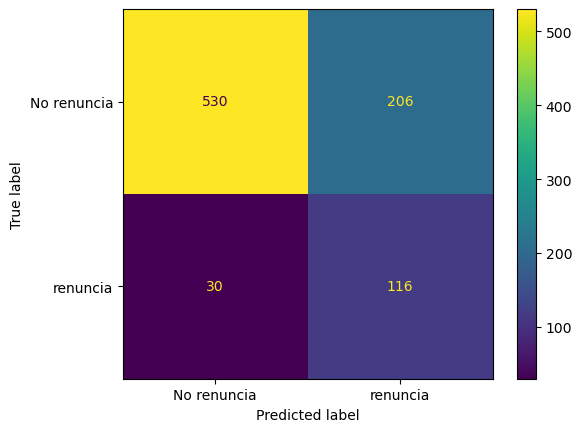

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [34]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.36024844720496896
Recall: 0.7945205479452054
Especificidad: 0.720108695652174
F1 score: 0.49572649572649563


In [35]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.27
RMSE 0.52
MAE: 0.27
MAPE: 1051861137458415.12
R2: -0.94
R2-adjusted: -1.04


### Modelo 1.1 regresion logistica con Wrapper

In [36]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base2, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base2)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.734


In [37]:
y_pred = modelo.predict(X_test_base2)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.722


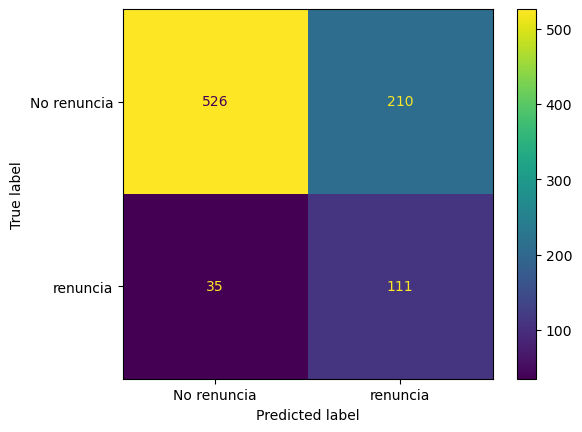

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [39]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.34579439252336447
Recall: 0.7602739726027398
Especificidad: 0.7146739130434783
F1 score: 0.4753747323340471


In [40]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.28
RMSE 0.53
MAE: 0.28
MAPE: 1072285625564403.75
R2: -1.01
R2-adjusted: -1.12


### Modelo 1.2 regresion logistica con balanceo de clases manual

In [41]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142)

# Ajustar el modelo a los datos
modelo.fit(x_train_res, y_train_res)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(x_train_res)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train_res, y_train_pred2) )

Exactitud en el entrenamiento: 0.764


In [44]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.739


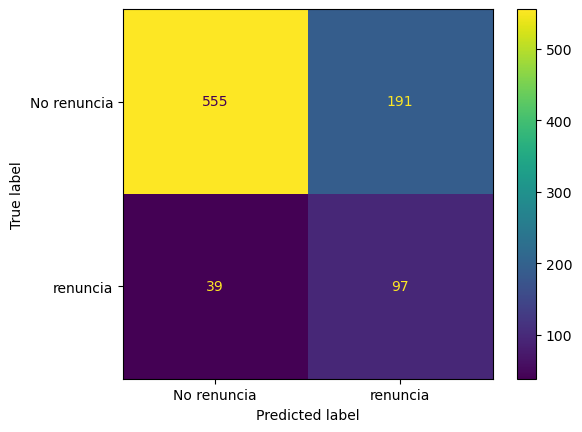

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [46]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3368055555555556
Recall: 0.7132352941176471
Especificidad: 0.7439678284182306
F1 score: 0.4575471698113208


# Modelo 2 Árboles de decisión

### 2.1 Modelo de arboles de decision con metodo integrado

In [99]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [100]:
X_train_modelo2=X_train_base1
X_test_modelo2=X_test_base1

clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 6, max_leaf_nodes=30, random_state=142, class_weight="balanced")
clf.fit(X_train_modelo2, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=30,
                       random_state=142)

In [101]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train_modelo2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train_modelo2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test_modelo2)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test_modelo2)))

Train - Accuracy : 0.8030045351473923
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      2963
           1       0.44      0.78      0.56       565

    accuracy                           0.80      3528
   macro avg       0.69      0.79      0.72      3528
weighted avg       0.87      0.80      0.82      3528

Test - Accuracy : 0.7743764172335601
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.80      0.85       736
           1       0.39      0.66      0.49       146

    accuracy                           0.77       882
   macro avg       0.66      0.73      0.67       882
weighted avg       0.84      0.77      0.80       882



In [102]:
from sklearn.metrics import recall_score
print ("Train - recall:\n", metrics.recall_score(y_train, clf.predict(X_train_modelo2)))
print ("Test - recall :", metrics.recall_score(y_test, clf.predict(X_test_modelo2)))

Train - recall:
 0.7787610619469026
Test - recall : 0.6643835616438356


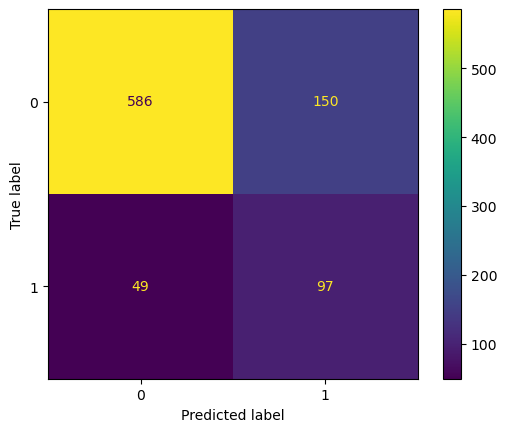

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, clf.predict(X_test_modelo2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

Profundidad del árbol: 6
Número de nodos terminales: 30


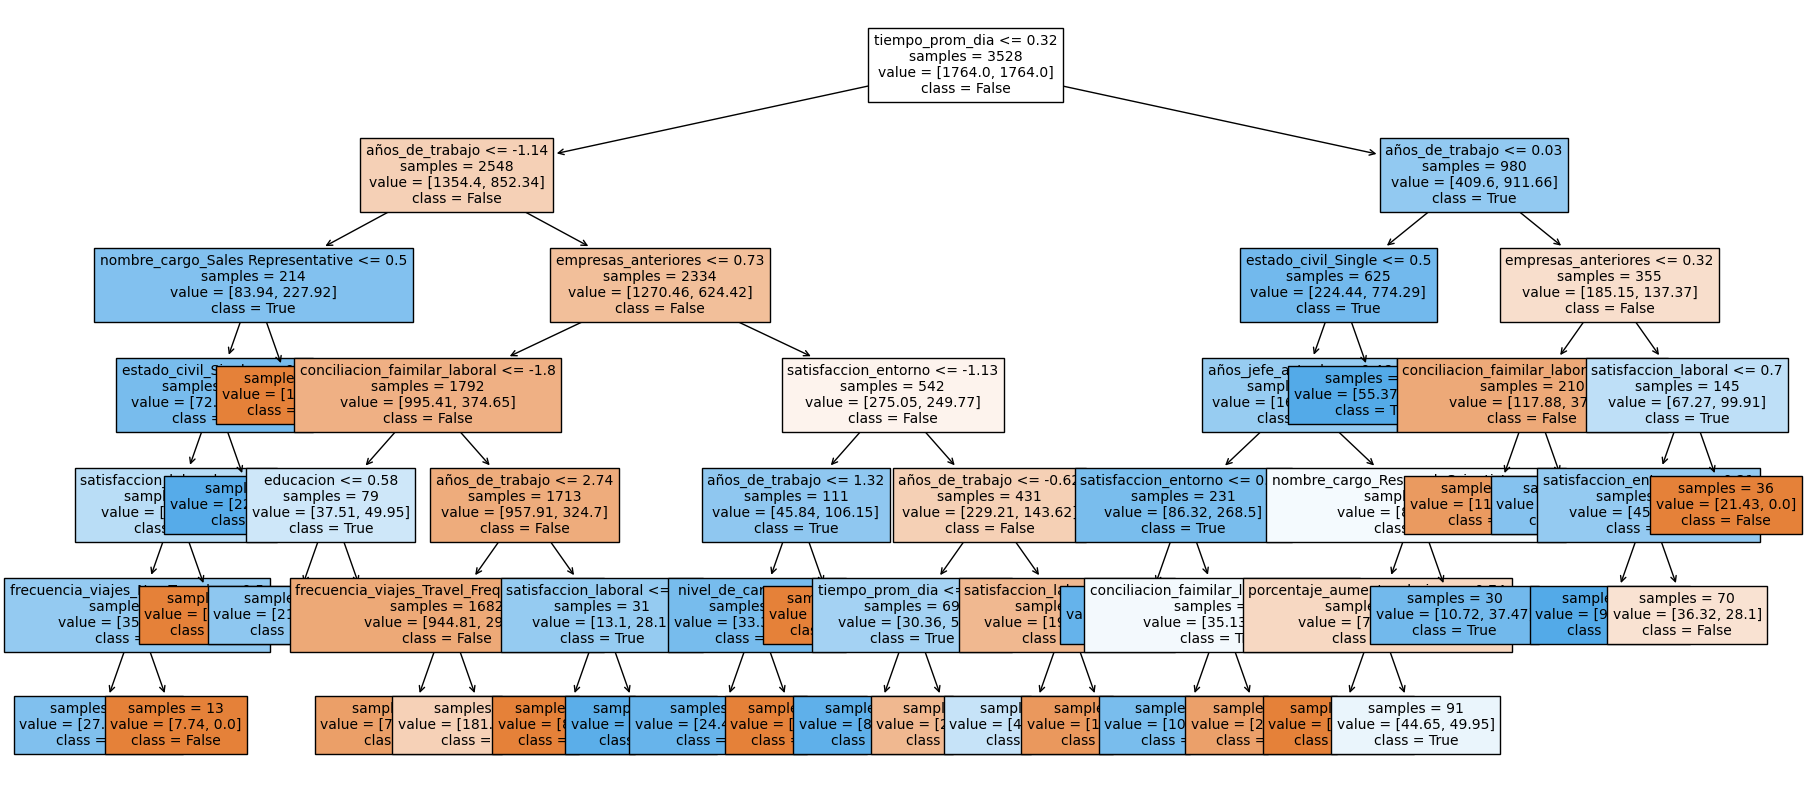

In [104]:
from sklearn.tree import plot_tree    ##########duda
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(decision_tree = clf, feature_names=X_train.iloc[:,X_new].columns.tolist(), class_names= ['False', 'True'],filled= True,impurity= False,fontsize= 10,precision= 2,ax= ax)

### 2.2  Modelo de arbol de desicion con metodo wrapper

In [115]:
X_train_modelo2_2=X_train_base2
X_test_modelo2_2=X_test_base2

clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 6, max_leaf_nodes=30, random_state=142, class_weight="balanced")
clf.fit(X_train_modelo2_2, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=30,
                       random_state=142)

In [116]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train_modelo2_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train_modelo2_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test_modelo2_2)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test_modelo2_2)))

Train - Accuracy : 0.8089569160997733
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      2963
           1       0.44      0.77      0.56       565

    accuracy                           0.81      3528
   macro avg       0.70      0.79      0.72      3528
weighted avg       0.87      0.81      0.83      3528

Test - Accuracy : 0.7913832199546486
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.82      0.87       736
           1       0.42      0.67      0.52       146

    accuracy                           0.79       882
   macro avg       0.67      0.74      0.69       882
weighted avg       0.84      0.79      0.81       882



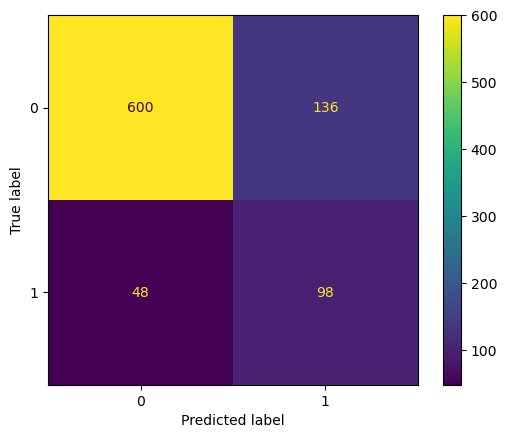

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, clf.predict(X_test_modelo2_2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

Profundidad del árbol: 6
Número de nodos terminales: 30


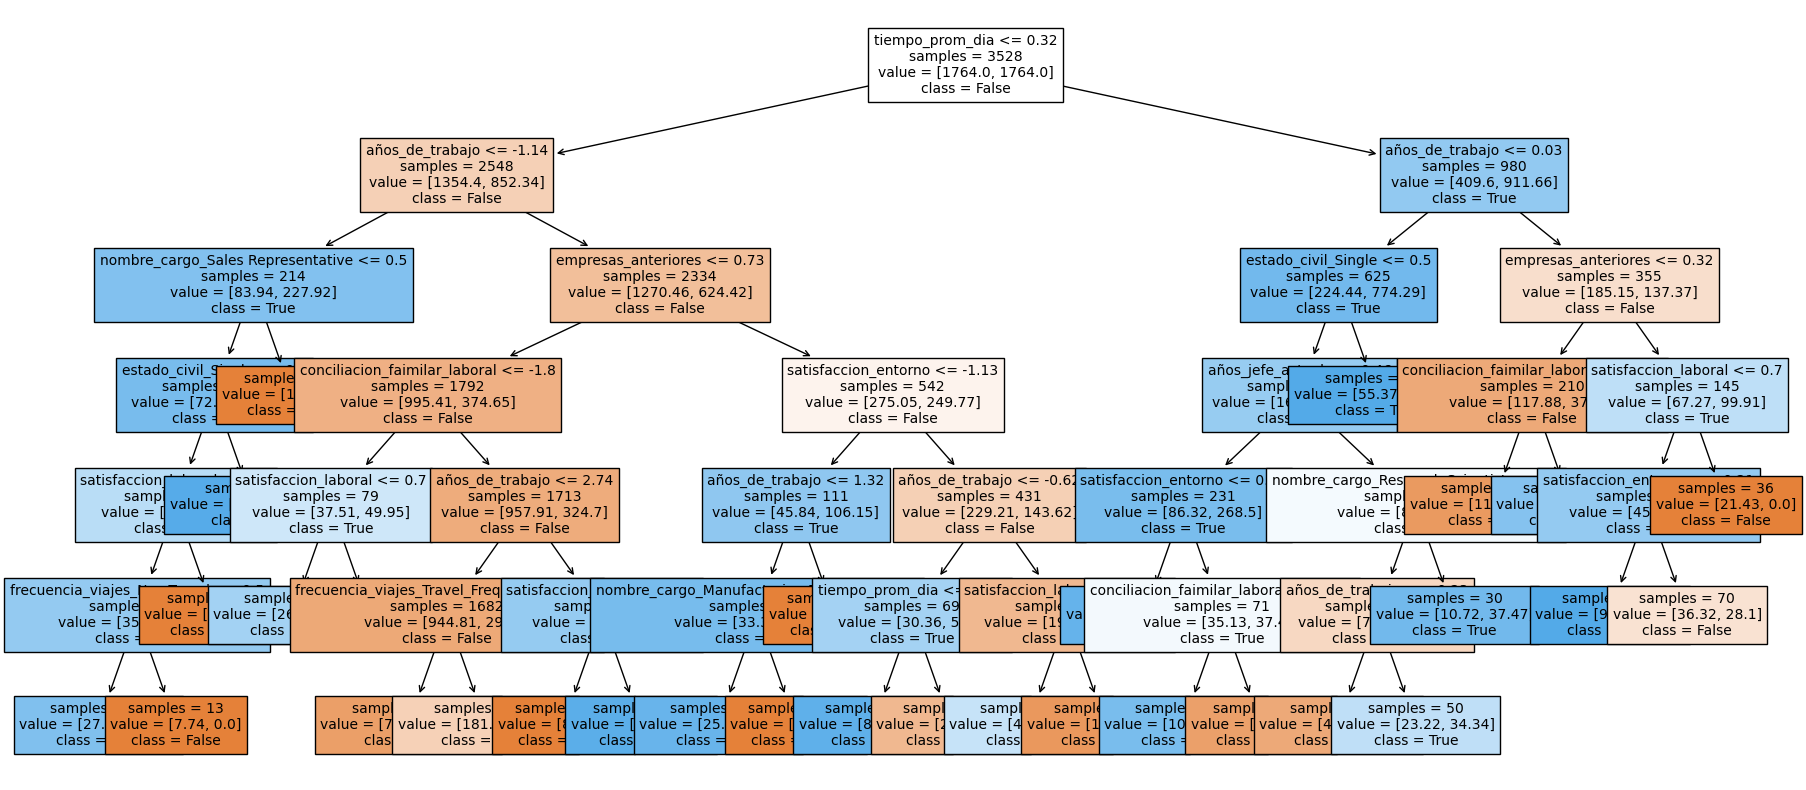

In [126]:
from sklearn.tree import plot_tree    ##########duda
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(decision_tree = clf,feature_names = X_train.iloc[:,X_new_class].columns.tolist(),class_names= ['False', 'True'],filled= True,impurity= False,fontsize= 10,precision= 2,ax= ax)

# Modelo 3 Random Forest

### 3.1 Modelo random forest con metodo integrado

In [96]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

In [97]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.8120748299319728
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      2963
           1       0.45      0.75      0.56       565

    accuracy                           0.81      3528
   macro avg       0.70      0.79      0.72      3528
weighted avg       0.87      0.81      0.83      3528

Test - Accuracy : 0.8095238095238095
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.83      0.88       736
           1       0.45      0.70      0.55       146

    accuracy                           0.81       882
   macro avg       0.69      0.77      0.71       882
weighted avg       0.85      0.81      0.82       882



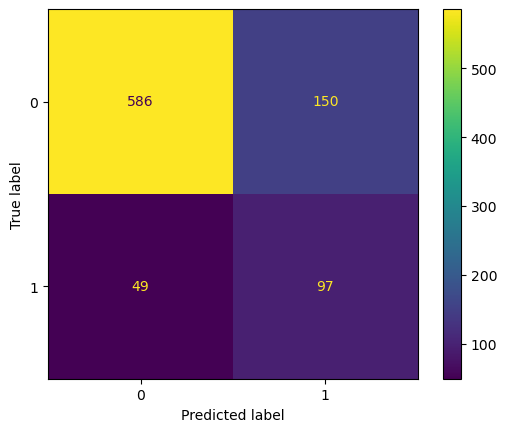

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, clf.predict(X_test_modelo3))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

### 3.2 Modelo random forest con metodo wrapper

In [112]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3_2=X_train_base2
X_test_modelo3_2=X_test_base2

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3_2, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

In [114]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3_2)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3_2)))

Train - Accuracy : 0.8081065759637188
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      2963
           1       0.44      0.72      0.54       565

    accuracy                           0.81      3528
   macro avg       0.69      0.77      0.71      3528
weighted avg       0.86      0.81      0.82      3528

Test - Accuracy : 0.8027210884353742
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.83      0.88       736
           1       0.44      0.64      0.52       146

    accuracy                           0.80       882
   macro avg       0.68      0.74      0.70       882
weighted avg       0.84      0.80      0.82       882



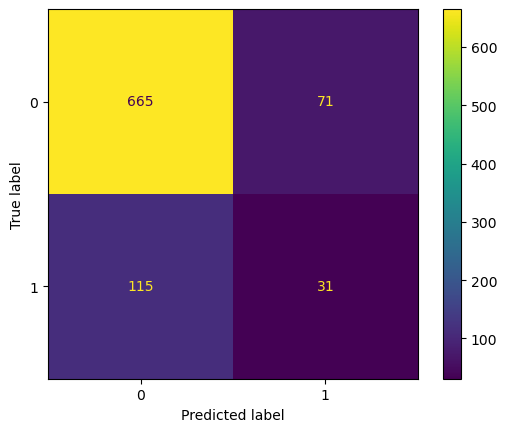

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, clf.predict(X_test_modelo3_2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

# Modelo 4 Gradient Boosting Classifier

### 4.1 Modelo de Gradient Boosting con metodo integrado

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std[:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

In [133]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 0.8997637529530881
Train - classification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2963
           1       0.92      0.88      0.90      2963

    accuracy                           0.90      5926
   macro avg       0.90      0.90      0.90      5926
weighted avg       0.90      0.90      0.90      5926

Test - Accuracy : 0.8650793650793651
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.90      0.92       736
           1       0.57      0.71      0.64       146

    accuracy                           0.87       882
   macro avg       0.76      0.80      0.78       882
weighted avg       0.88      0.87      0.87       882



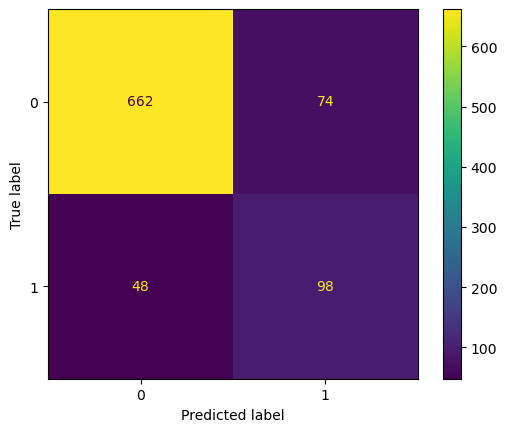

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

### 4.2 Modelo de Gradient Boosting con metodo wrapper

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4_2= x_train_res[:, X_new_class]
X_test_modelo4_2 = X_test_std[:, X_new_class]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4_2, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

In [131]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4_2)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4_2)))

Train - Accuracy : 0.8994262571717854
Train - classification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2963
           1       0.92      0.88      0.90      2963

    accuracy                           0.90      5926
   macro avg       0.90      0.90      0.90      5926
weighted avg       0.90      0.90      0.90      5926

Test - Accuracy : 0.8616780045351474
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.90      0.92       736
           1       0.57      0.67      0.62       146

    accuracy                           0.86       882
   macro avg       0.75      0.79      0.77       882
weighted avg       0.87      0.86      0.87       882



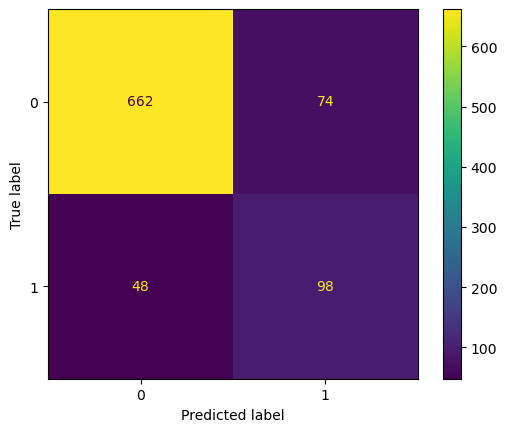

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

# Modelo 5 Support Vector Machine 

### 5.1 Modelo de support vector machine con metodo integrado

In [108]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [109]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.7437641723356009
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83      2963
           1       0.36      0.75      0.48       565

    accuracy                           0.74      3528
   macro avg       0.65      0.75      0.66      3528
weighted avg       0.85      0.74      0.77      3528

Test - Accuracy : 0.7437641723356009
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.74      0.83       736
           1       0.37      0.77      0.50       146

    accuracy                           0.74       882
   macro avg       0.65      0.75      0.66       882
weighted avg       0.85      0.74      0.77       882



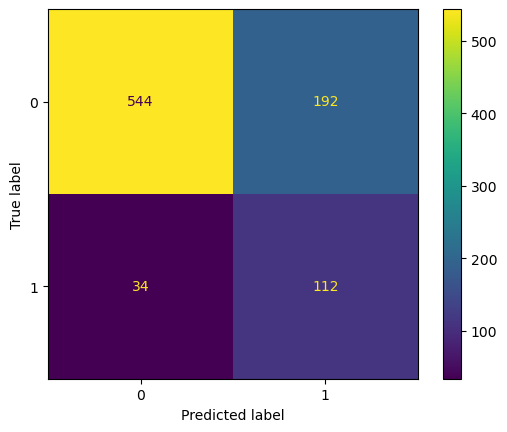

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

###  5.2 Modelo support vector machine con metodo wrapper


In [118]:
from sklearn.svm import SVC
X_train_modelo5_2=X_train_base2
X_test_modelo5_2=X_test_base2
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5_2, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [119]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5_2)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5_2)))

Train - Accuracy : 0.7363945578231292
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82      2963
           1       0.35      0.73      0.47       565

    accuracy                           0.74      3528
   macro avg       0.64      0.74      0.65      3528
weighted avg       0.84      0.74      0.77      3528

Test - Accuracy : 0.7403628117913832
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.73      0.82       736
           1       0.37      0.78      0.50       146

    accuracy                           0.74       882
   macro avg       0.66      0.76      0.66       882
weighted avg       0.85      0.74      0.77       882



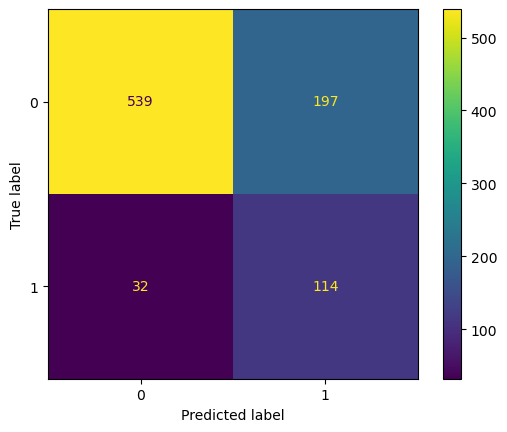

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()